In [1]:
import numpy as np

In [27]:
x_train = np.array([1,4,5,6])
y_train = np.array([400,700,900,1000])

In [29]:
def LR_model(x, w, b):
    f"""
    Args:
        x (ndarray (m,)) = training data, m examples
        w,b (scaler) = model parameters
    Returns:
        f_wb (ndarray (m,)) = model predictions
    
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

In [33]:
pred = LR_model(x_train, w=200, b=100)

In [34]:
pred

array([ 300.,  900., 1100., 1300.])

In [35]:
import matplotlib.pyplot as plt

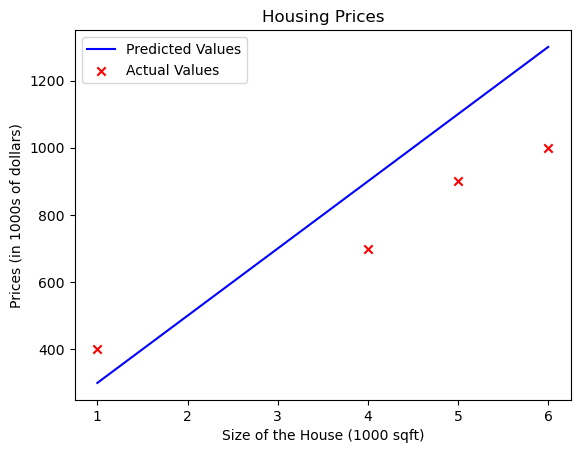

In [36]:
plt.plot(x_train, pred, c="b", label="Predicted Values" )
plt.scatter(x_train, y_train, marker="x", c="r", label = "Actual Values")
plt.title("Housing Prices")
plt.ylabel("Prices (in 1000s of dollars)")
plt.xlabel("Size of the House (1000 sqft)")
plt.legend()
plt.show()

In [37]:
np.argmin(pred)

0

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('./weight-height.csv')

In [43]:
df.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [59]:
x = df[["Height"]].values
y = df[["Weight"]].values

In [60]:
def MSE(y_pred, y):
    mse = (y - y_pred)**2 
    return np.sqrt(mse.mean())

In [61]:
def reg_model(x,w,b):
    y = w*x + b 
    return y

<Axes: xlabel='Height', ylabel='Weight'>

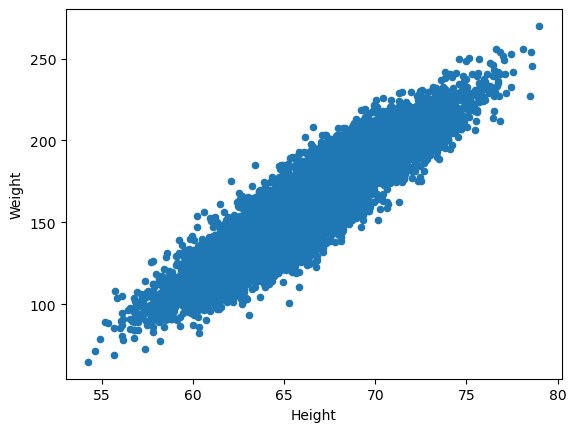

In [64]:
df.plot(kind="scatter",
        x="Height",
       y= "Weight")

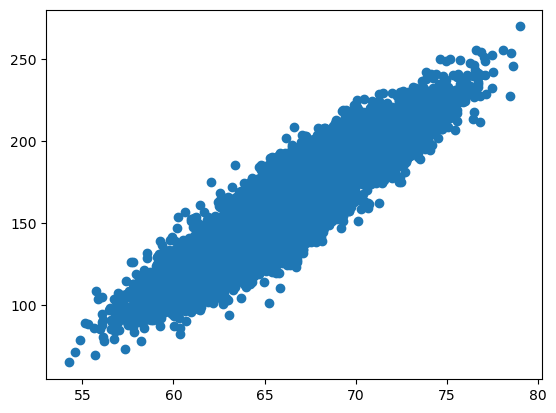

In [65]:
plt.scatter(x,y)

In [75]:
mses

[180.467985103827,
 131.1417931672291,
 82.62957208407575,
 38.172273320810234,
 32.96359686320369,
 75.60472859445356,
 123.87716195296917]

Text(0.5, 1.0, 'cost as the function of b')

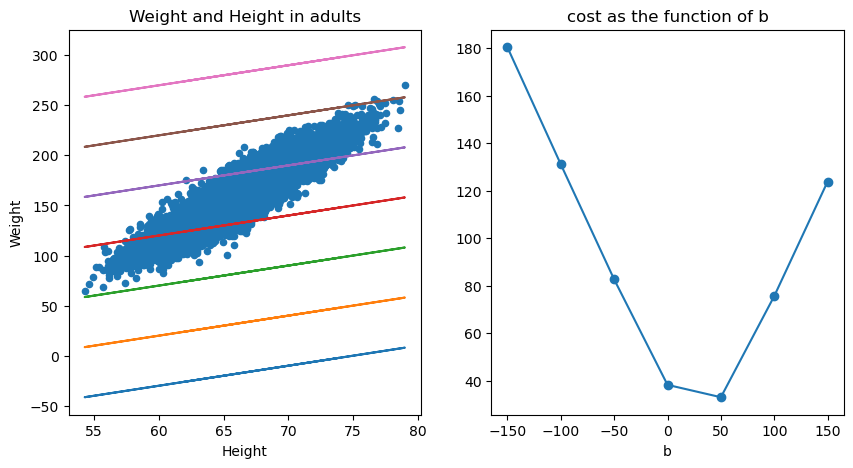

In [78]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind="scatter",
       x="Height",
       y="Weight",
       title="Weight and Height in adults",
       ax=ax1)

mses = []
bs = [-150,-100,-50,0,50,100,150]
w=2

for b1 in bs:
    y_pred = reg_model(x,w,b1)
    mse = MSE(y_pred, y)
    mses.append(mse)
    plt.plot(x,y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bs,mses, "-o")
plt.xlabel("b")
plt.title("cost as the function of b")

In [147]:
def compute_cost (x, y, w, b):
    
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i] )**2
    total_cost = (1 / 2 * m ) * cost
    
    return total_cost 

In [169]:
def compute_cost (x, y, w, b):
    
    m = x.shape[0]
    
    f_wb = np.dot(w,x) + b
    cost = (f_wb - y)**2
    total_cost = (1 / 2 * m ) * cost.sum()
    
    return total_cost 

In [170]:
compute_cost(np.array([4,5,6,7]),np.array([400,500,600,700]), 2, 3)

2394408.0

In [91]:
def compute_gradient(x,y,w,b):
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw = (f_wb - y[i]) * x[i]
        dj_db = (f_wb - y[i])
        dj_dw += dj_dw
        dj_db += dj_db
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db 

In [92]:
compute_gradient(np.array([4,5,6,7]),np.array([400,500,600,700]), 2, 3)

(-2390.5, -341.5)

In [104]:
import math, copy

In [112]:

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [113]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.07e+05  dj_dw: -1.000e+03, dj_db: -5.000e+02   w:  1.000e+01, b: 5.00000e+00
Iteration 1000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 2000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 3000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 4000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 5000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 6000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 7000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 8000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 6.72e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02


In [110]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [141]:
x_train = np.array([[4,6,7,8,10],
                  [10,34,56,68,90],
                  [3,7,10,20,60]])

y_train = np.array([300,500,700,1000,1200])

In [172]:
def compute_cost ():
    
    cost = 0
    m, n = x.shape
    
    for i in range (m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
        cost = cost / 2 * m
    return 

In [174]:
def compute_single_loop(x, w, b):
    m = x.shape[0]
    p = 0
    
    for i in range (0,m):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [205]:
20 % math.ceil(it_num/10) == 0

False

In [198]:
11 % math.ceil(it_num/10) == 0

False

In [199]:
9 % math.ceil(it_num/10) == 0

False

In [203]:
math.ceil(21/10)

3

In [210]:
it_num = 2100

In [211]:
for i in range(it_num):
    if i % math.ceil(it_num/10) == 0:
        print ("iteration", i)

iteration 0
iteration 210
iteration 420
iteration 630
iteration 840
iteration 1050
iteration 1260
iteration 1470
iteration 1680
iteration 1890


In [218]:
5 % 3

2

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt